In [741]:
# 기본 옵션
options(warn = -1)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

# library 불러오기
library(stringr)
library(plotrix)
library(dplyr)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

## 유흥업소가 많은 지역 주변에는 폭행 범죄가 많이 발생할 것이다.

In [ ]:
# 데이터 불러오기
crime <- read.csv("Data/서울시 5대 범죄발생 현황.csv")
# 불필요한 행,열 제거
crime <- crime[-c(1:3),-c(2,4,5)]
# 열의 이름 변경
colnames(crime) <- c("발생년도","자치구별","살인발생","살인검거","강도발생","강도검거","강간/강제추행발생","강간/강제추행검거","절도발생","절도검거","폭력발생","폭력검거")
# 데이터 중 소계항목 제거
rownames(crime) <- c()
subset(crime,자치구별 == "소계")
crime <- crime[-c(26,52,78),]
rownames(crime) <- c()
# 결측치를 0으로 변경
for(i in 3:12) {
    cat(i,"번째 열('-' 확인) : ",nrow(subset(crime,crime[,i] == "-")),"\n")
    if(nrow(subset(crime,crime[,i] == "-")) > 0) {
        crime[,i] <- str_replace_all(crime[,i],"-","0")
        cat(i,"번째 열 변경","\n")
    }
}
# numeric type으로 변경
for(i in 3:12) {
    crime[,i] <- as.numeric(crime[,i])
}

# 결측치 확인
for(i in 3:12) {
    cat(i,"번째 :",sum(is.na(crime[,i])),"\n")
}

In [771]:
# 연도별로 폭력 발생이 가장 높은 자치구
arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,]
arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[1:5,]
arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[1:5,]
arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,]
# 연도별로 폭력 발생이 가장 낮은 자치구
arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,]
arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[21:25,]
arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[21:25,]
arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,]

# 연도별 상위 TOP4에는 공통적으로 강남,영등포,송파,관악이 포함되어있었다!!
crime_top4 <- rbind(
                    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:4,],
                    arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[1:4,],
                    arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[1:4,],
                    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:4,]
                    )
crime_top4$발생년도 <- as.numeric(crime_top4$발생년도)

# 또한 연도별 하위 TOP3에는 서대문구,도봉구,성동구는 포함되어있었다!!
crime_bottom3 <- rbind(
                    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[23:25,],
                    arrange(subset(crime,발생년도 == '2020'),desc(폭력발생))[23:25,],
                    arrange(subset(crime,발생년도 == '2021'),desc(폭력발생))[23:25,],
                    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[23:25,]
                    )
crime_bottom3$발생년도 <- as.numeric(crime_bottom3$발생년도)                    

,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,강남구,5,3,5,6,666,562,2970,1339,3658,3159
2,2019,영등포구,10,10,3,3,356,239,2409,1068,3042,2467
3,2019,송파구,7,8,10,10,273,230,2416,1016,2992,2535
4,2019,관악구,13,10,10,11,408,335,2223,1085,2674,2369
5,2019,서초구,5,5,7,5,616,412,2270,1118,2644,2210


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020,강남구,6,5,14,11,708,627,2951,1491,3677,3111
2,2020,영등포구,7,4,6,5,315,252,2188,953,2701,2157
3,2020,송파구,6,6,13,17,287,235,2429,1006,2675,2280
4,2020,관악구,12,12,3,3,403,351,2229,1137,2614,2355
5,2020,강서구,10,9,6,5,265,222,1689,1070,2445,2087


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021,강남구,12,11,25,23,578,454,2372,1160,3159,2749
2,2021,송파구,3,3,7,6,247,216,2024,995,2433,2046
3,2021,관악구,8,4,7,6,321,269,1860,929,2248,1926
4,2021,영등포구,8,8,11,11,279,196,1712,831,2169,1731
5,2021,강서구,9,7,3,3,246,188,1540,921,2098,1925


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022,강남구,12,10,11,10,667,534,2495,1207,3762,3259
2,2022,송파구,2,2,5,6,290,220,2201,1033,2669,2148
3,2022,관악구,10,8,9,8,327,279,1966,1050,2567,2066
4,2022,영등포구,5,6,10,9,327,237,2062,953,2415,1981
5,2022,강서구,3,3,7,7,261,195,1991,1185,2401,2201


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2019,성북구,3,3,3,3,176,130,1082,731,1613,1456
22,2019,양천구,6,6,2,2,127,112,1477,634,1602,1370
23,2019,서대문구,2,1,5,5,175,154,1226,600,1535,1260
24,2019,성동구,6,5,9,10,133,96,970,511,1394,1216
25,2019,도봉구,1,1,5,5,90,83,790,394,1224,1014


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2020,금천구,4,4,7,6,117,93,999,553,1471,1310
22,2020,성북구,4,4,3,2,142,121,988,580,1430,1240
23,2020,서대문구,3,3,2,1,159,149,1077,524,1292,1029
24,2020,도봉구,0,0,2,2,82,87,861,379,1234,1022
25,2020,성동구,5,5,3,3,115,98,1016,565,1223,1103


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2021,용산구,3,2,1,1,141,103,945,484,1291,1069
22,2021,금천구,7,6,3,4,134,103,1013,520,1282,1108
23,2021,서대문구,3,3,2,2,137,120,1027,562,1109,907
24,2021,성동구,3,4,4,1,110,82,905,497,1090,926
25,2021,도봉구,2,2,2,1,72,64,772,376,1012,851


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2022,금천구,2,1,3,3,127,87,1118,662,1327,1134
22,2022,동작구,2,3,5,5,212,107,1195,588,1321,1038
23,2022,도봉구,3,3,0,0,70,54,969,546,1099,966
24,2022,서대문구,5,4,6,6,157,144,1114,565,1092,886
25,2022,성동구,2,2,2,2,125,97,979,538,1086,958


In [ ]:
# 차트 크기 조정
options(repr.plot.width=40, repr.plot.height=9)

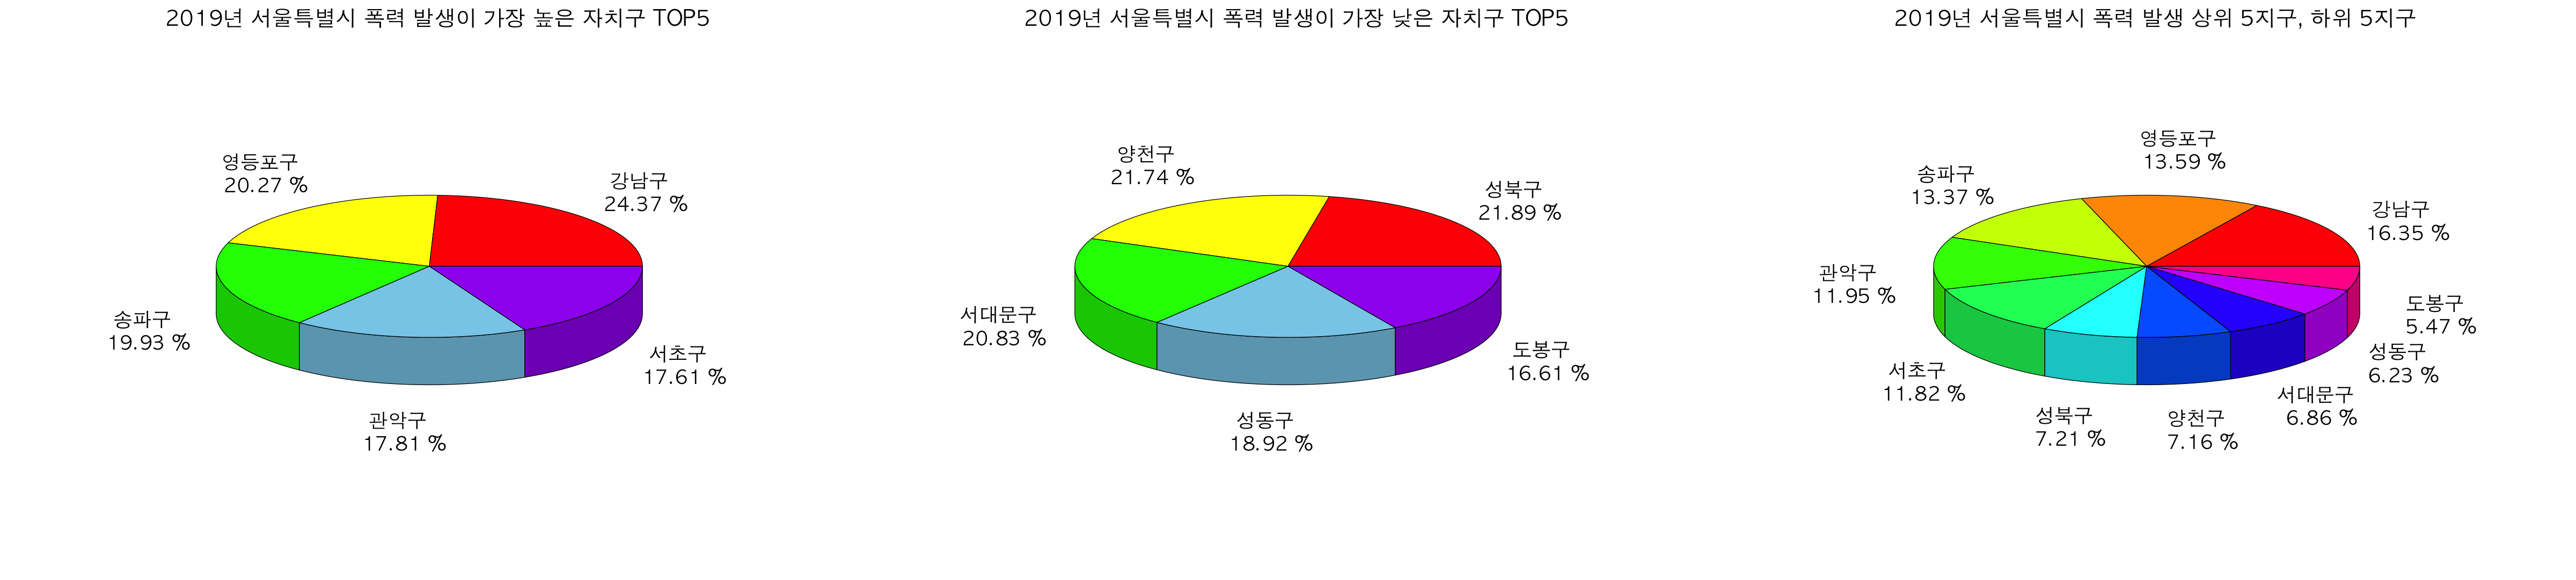

In [744]:
# 2019년 폭력 발생이 가장 높은 지역 TOP5
par(bg = 'white',family = "applegothic")
par(mfrow = c(1,3))

pie3D(
    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,2],"\n",
        round(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,11] / sum(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','yellow','green','skyblue','purple')
)
title(
    main = "2019년 서울특별시 폭력 발생이 가장 높은 자치구 TOP5",
    cex.main = 3
)
# 결과 : 2019년에 가장 많이 발생한 5곳의 자치구들을 살펴본 결과, 강남구는 그 중에서도 비율이 가장 높았다.

# 2019년 폭력 발생이 가장 낮은 지역 TOP5
par(bg = 'white',family = "applegothic")

pie3D(
    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,2],"\n",
        round(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,11] / sum(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','yellow','green','skyblue','purple')
)
title(
    main = "2019년 서울특별시 폭력 발생이 가장 낮은 자치구 TOP5",
    cex.main = 3
)
# 결과 : 2019년에 가장 적게 발생한 5곳의 자치구들을 살펴본 결과, 도봉구는 그 중에서도 비율이 가장 높았다.

par(bg = 'white',family = "applegothic")

pie3D(
    arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),2],"\n",
        round(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),11] / sum(arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[c(1:5,21:25),11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
)
title(
    main = "2019년 서울특별시 폭력 발생 상위 5지구, 하위 5지구",
    cex.main = 3
)

# 2019년의 강남구와 도봉구의 유흥업소를 비교

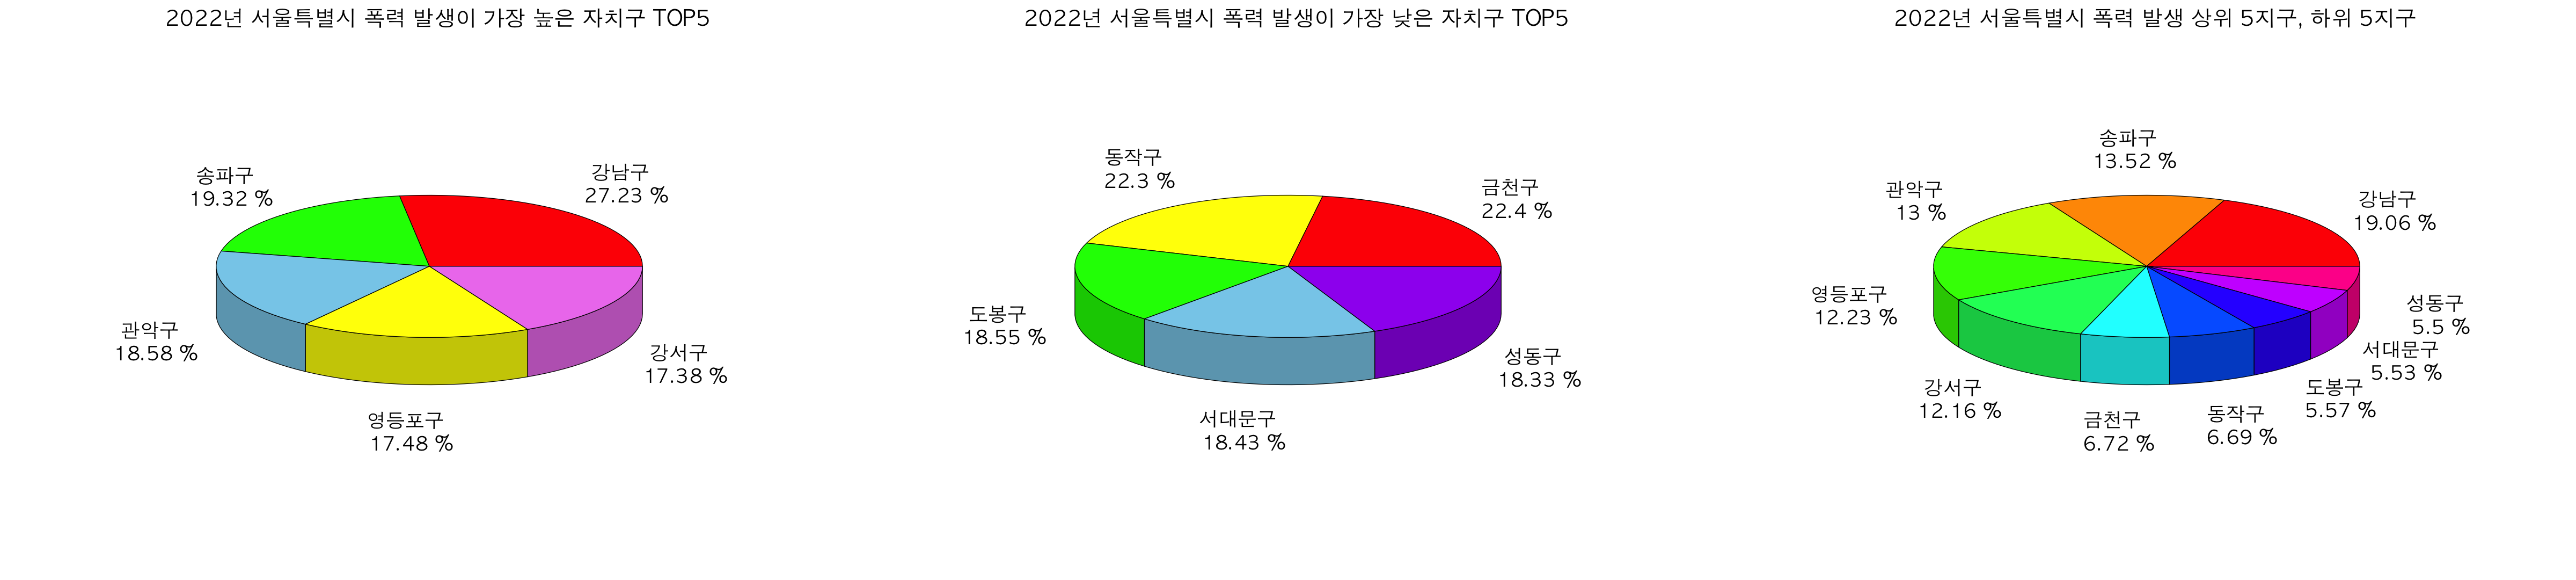

In [750]:
# 2022년 폭력 발생이 가장 높은 지역 TOP5
par(bg = 'white',family = "applegothic")
par(mfrow = c(1,3))
pie3D(
    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,2],"\n",
        round(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,11] / sum(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[1:5,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','green','skyblue','yellow','violet')
)
title(
    main = "2022년 서울특별시 폭력 발생이 가장 높은 자치구 TOP5",
    cex.main = 3
)

# 2019년 폭력 발생이 가장 낮은 지역 TOP5
pie3D(
    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,2],"\n",
        round(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,11] / sum(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[21:25,11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
    col = c('red','yellow','green','skyblue','purple')
)
title(
    main = "2022년 서울특별시 폭력 발생이 가장 낮은 자치구 TOP5",
    cex.main = 3
)


pie3D(
    arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),11],
    labels = paste(
        arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),2],"\n",
        round(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),11] / sum(arrange(subset(crime,발생년도 == '2022'),desc(폭력발생))[c(1:5,21:25),11]) * 100,2),"%"),
    labelcex = 1.8,
    radius = 0.9,
)
title(
    main = "2022년 서울특별시 폭력 발생 상위 5지구, 하위 5지구",
    cex.main = 3
)

In [754]:
options(repr.plot.width=15, repr.plot.height=9)

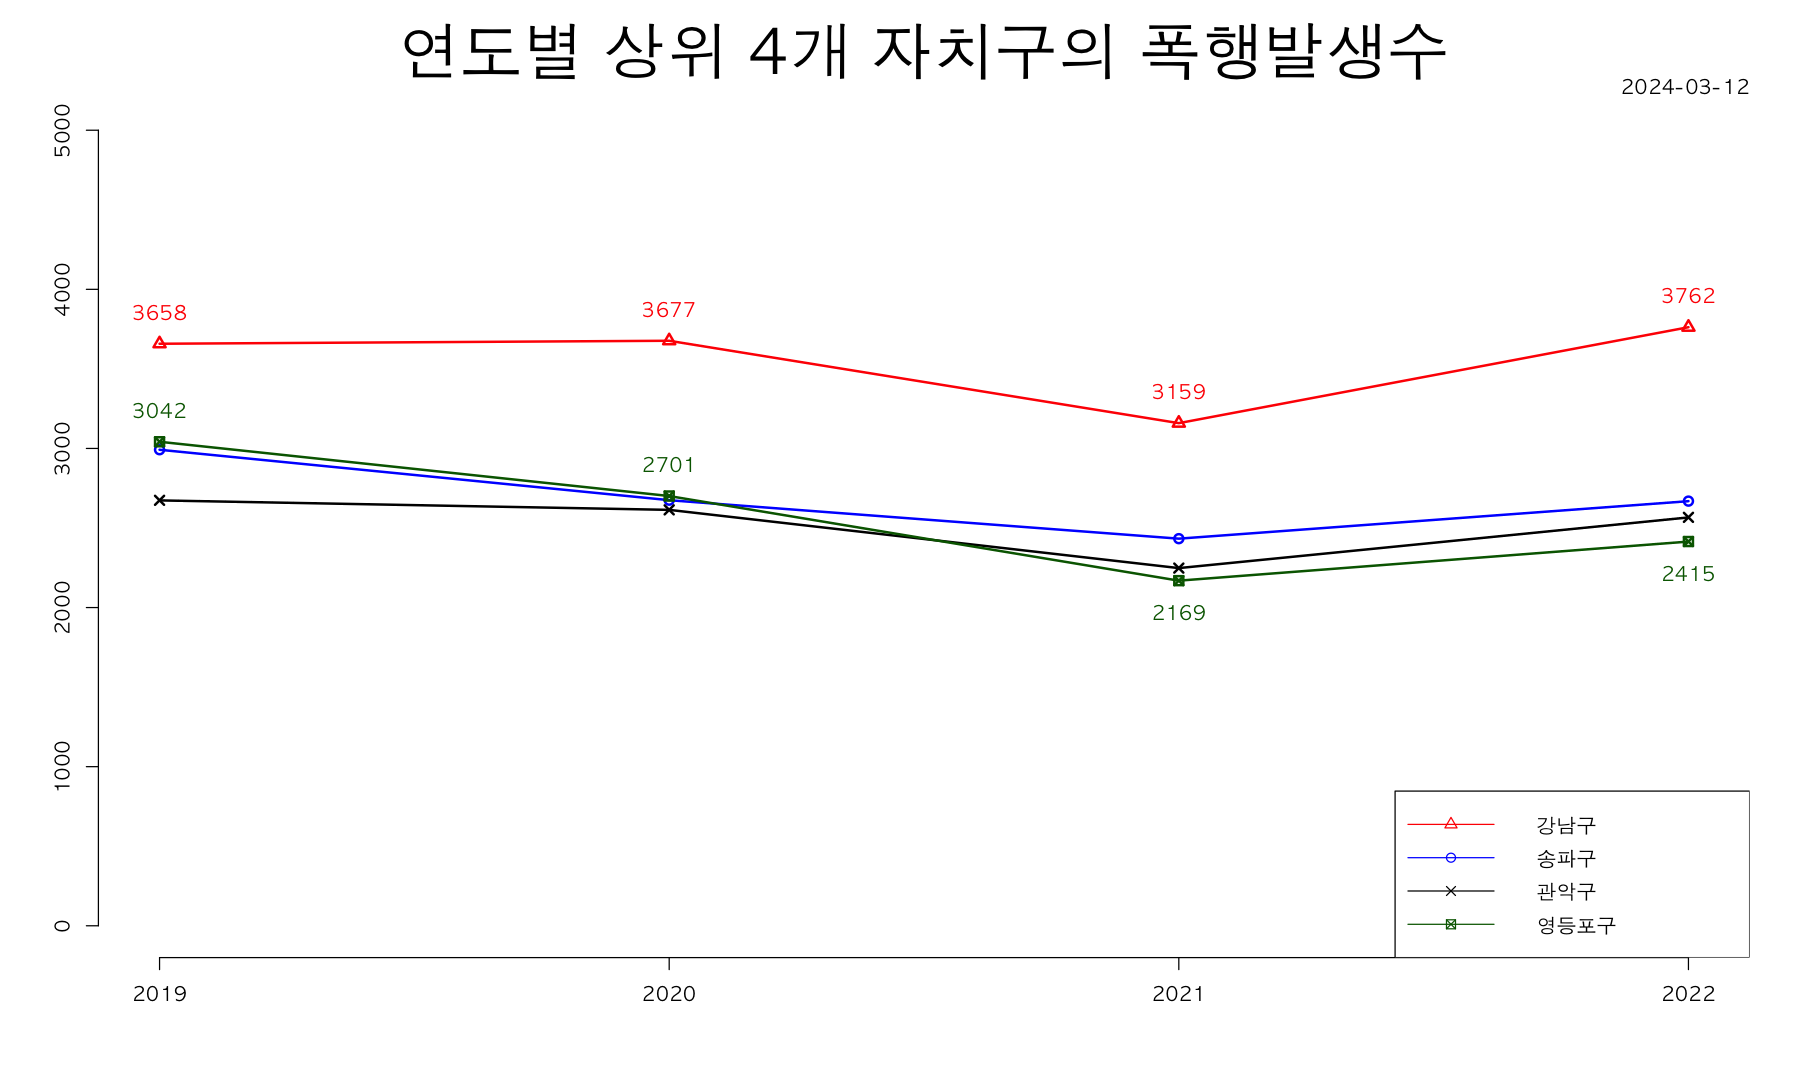

In [755]:
# 2019년 ~ 2022년 사이 폭력사건이 가장 많이 발생한 지역 TOP 5을 선정하였을때, 
# 강남구,송파구,관악구,영등포구 이 4개의 자치구들은 항상 포함되어 있었음.
# 이 4개의 자치구들을 꺾은선 그래프를 통해 비교.
par(bg = 'white',family = "applegothic")
plot(
    subset(crime_top4,자치구별 == '강남구')[,c(1,11)],
    type = 'o',
    col = 'red',
    axes = F,
    ann = F,
    lwd = 2,
    ylim = c(0,5000),
    pch = 2
)

text(
    c(2019:2022),
    subset(crime_top4,자치구별 == '강남구')[,c(11)] + 200,
    subset(crime_top4,자치구별 == '강남구')[,c(11)],
    col = 'red'
)

text(
    c(2019:2022),
    c(subset(crime_top4,자치구별 == '영등포구')[,c(11)][1:2] + 200, subset(crime_top4,자치구별 == '영등포구')[,c(11)][3:4] - 200),
    subset(crime_top4,자치구별 == '영등포구')[,c(11)],
    col = 'darkgreen'
)

title(
    main = "연도별 상위 4개 자치구의 폭행발생수",
    cex.main = 3.1,
)
axis(1,at = 2019:2022)
axis(2)

lines(
    subset(crime_top4,자치구별 == '송파구')[,c(1,11)],
    type = 'o',
    col = 'BLUE',
    lwd = 2,
    pch = 1,
)

lines(
    subset(crime_top4,자치구별 == '관악구')[,c(1,11)],
    type = 'o',
    col = 'BLACK',
    lwd = 2,
    pch = 4
)

lines(
    subset(crime_top4,자치구별 == '영등포구')[,c(1,11)],
    type = 'o',
    col = 'darkgreen',
    lwd = 2,
    pch = 7
)

legend(
    "bottomright",
    legend = c("강남구","송파구","관악구","영등포구"),
    lty = 1,
    col = c("red","blue","black","darkgreen"),
    pch = c(2,1,4,7)
)

mtext("2024-03-12", side = 3, adj = 1, cex = 1)

### 4개년을 비교하였을때, 강남구는 항상 1등에 위치한다.
### 송파구와 관악구는 유의미한 변동이 존재하지 않지만, 영등포구는 하향세를 띄고 있다.

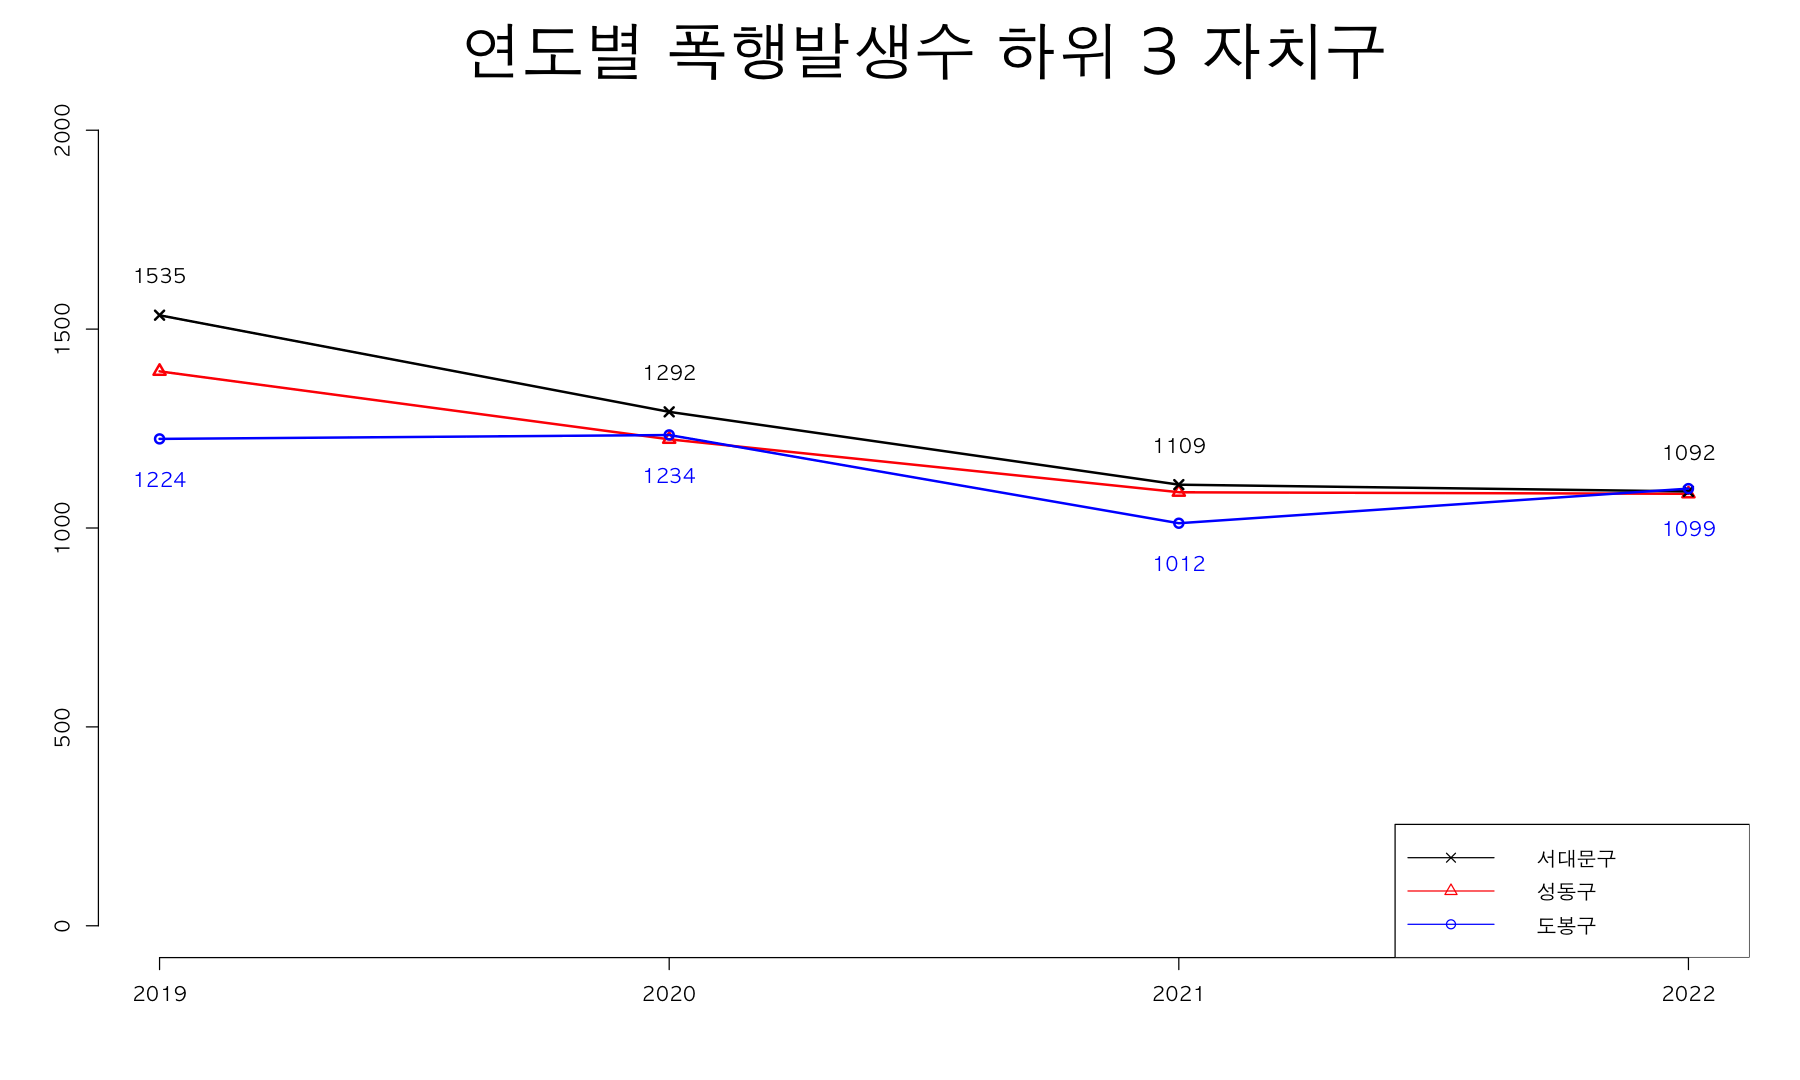

In [781]:
# 서대문구,도봉구,성동구
par(bg = 'white',family = "applegothic")
plot(
    subset(crime_bottom3,자치구별 == '성동구')[,c(1,11)],
    type = 'o',
    col = 'red',
    axes = F,
    ann = F,
    lwd = 2,
    pch = 2,
    ylim = c(0,2000)
)

title(
    main = "연도별 폭행발생수 하위 3 자치구",
    cex.main = 3.1,
)

axis(1,at = 2019:2022)
axis(2)


lines(
    subset(crime_bottom3,자치구별 == '서대문구')[,c(1,11)],
    type = 'o',
    col = 'BLACK',
    lwd = 2,
    pch = 4
)
text(
    c(2019:2022),
    subset(crime_bottom3,자치구별 == '서대문구')[,c(11)] + 100,
    subset(crime_bottom3,자치구별 == '서대문구')[,c(11)],
    col = 'BLACK'
)

lines(
    subset(crime_bottom3,자치구별 == '도봉구')[,c(1,11)],
    type = 'o',
    col = 'BLUE',
    lwd = 2,
    pch = 1,
)
text(
    c(2019:2022),
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)][1:4] - 100,
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)],
    col = 'BLUE'
)

legend(
    "bottomright",
    legend = c("서대문구","성동구","도봉구"),
    lty = 1,
    col = c("black","red","blue"),
    pch = c(4,2,1)
)

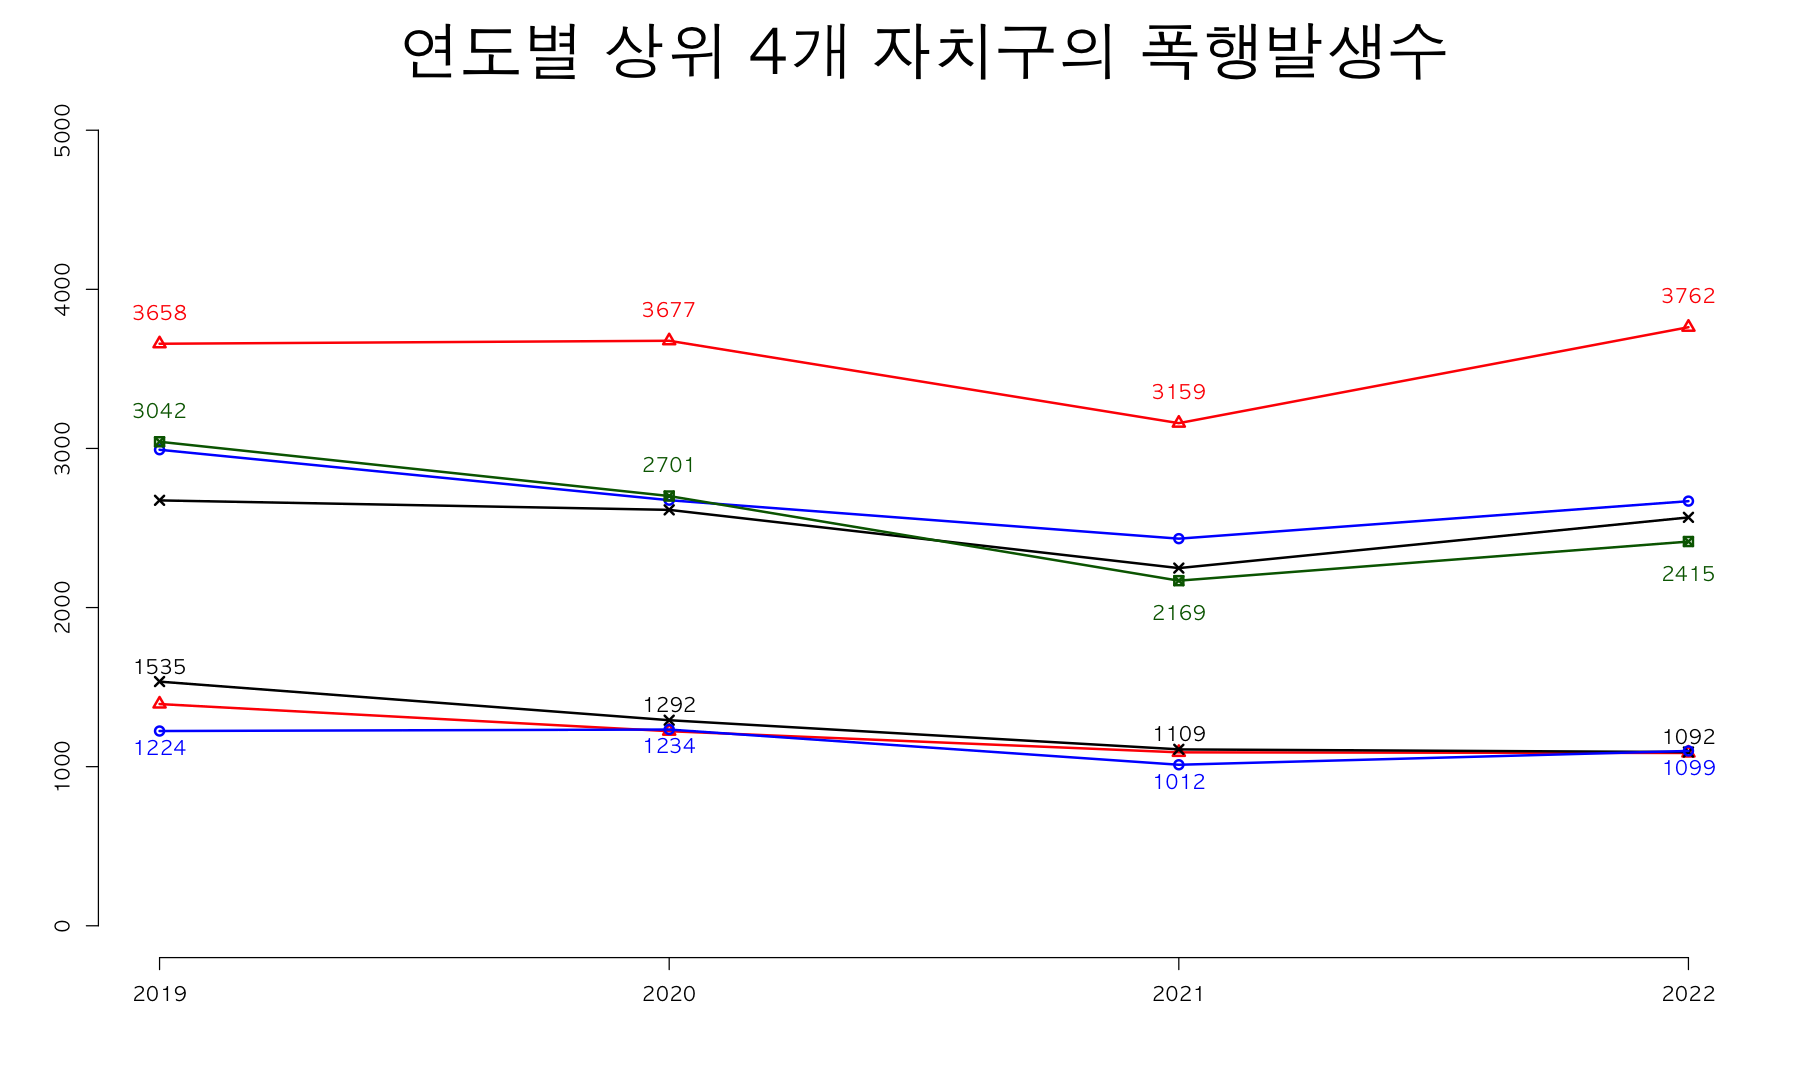

In [783]:
par(bg = 'white',family = "applegothic")
plot(
    subset(crime_top4,자치구별 == '강남구')[,c(1,11)],
    type = 'o',
    col = 'red',
    axes = F,
    ann = F,
    lwd = 2,
    ylim = c(0,5000),
    pch = 2
)

text(
    c(2019:2022),
    subset(crime_top4,자치구별 == '강남구')[,c(11)] + 200,
    subset(crime_top4,자치구별 == '강남구')[,c(11)],
    col = 'red'
)

text(
    c(2019:2022),
    c(subset(crime_top4,자치구별 == '영등포구')[,c(11)][1:2] + 200, subset(crime_top4,자치구별 == '영등포구')[,c(11)][3:4] - 200),
    subset(crime_top4,자치구별 == '영등포구')[,c(11)],
    col = 'darkgreen'
)

title(
    main = "연도별 상위 4개 자치구의 폭행발생수",
    cex.main = 3.1,
)
axis(1,at = 2019:2022)
axis(2)

lines(
    subset(crime_top4,자치구별 == '송파구')[,c(1,11)],
    type = 'o',
    col = 'BLUE',
    lwd = 2,
    pch = 1,
)

lines(
    subset(crime_top4,자치구별 == '관악구')[,c(1,11)],
    type = 'o',
    col = 'BLACK',
    lwd = 2,
    pch = 4
)

lines(
    subset(crime_top4,자치구별 == '영등포구')[,c(1,11)],
    type = 'o',
    col = 'darkgreen',
    lwd = 2,
    pch = 7
)

lines(
    subset(crime_bottom3,자치구별 == '성동구')[,c(1,11)],
    type = 'o',
    col = 'red',
    lwd = 2,
    pch = 2,
)

lines(
    subset(crime_bottom3,자치구별 == '서대문구')[,c(1,11)],
    type = 'o',
    col = 'BLACK',
    lwd = 2,
    pch = 4
)
text(
    c(2019:2022),
    subset(crime_bottom3,자치구별 == '서대문구')[,c(11)] + 100,
    subset(crime_bottom3,자치구별 == '서대문구')[,c(11)],
    col = 'BLACK'
)

lines(
    subset(crime_bottom3,자치구별 == '도봉구')[,c(1,11)],
    type = 'o',
    col = 'BLUE',
    lwd = 2,
    pch = 1,
)
text(
    c(2019:2022),
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)][1:4] - 100,
    subset(crime_bottom3,자치구별 == '도봉구')[,c(11)],
    col = 'BLUE'
)

## 자치구에 따른 유흥업소

In [ ]:
# 파일 불러오기
store_강남 <- read.csv("Data/서울 강남 유흥주점.csv",fileEncoding = "EUC-KR")

# 삭제 컬럼 번지 : 1,2, 4,5,6,7,  10,11,12,13,14,15,  17,18,  21,22,  24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
# 남은 컬럼 번지 : 3,8,9,16,19,20,23
store_강남 <- store_강남[,-c(1:2,4:7,10:15,17:18,21:22,24:44)]

# 인허가일자,폐업일자,최종수정일자 포맷 변경(YYYYMMDD)
store_강남$인허가일자 <- str_replace_all(store_강남$인허가일자,"-","")
store_강남$폐업일자 <- str_replace_all(store_강남$폐업일자,"-","")
store_강남$최종수정일자 <- str_replace_all(store_강남$최종수정일자,"-","")

# 최종수정일자 시,분,초 제외
store_강남$최종수정일자 <- substr(store_강남$최종수정일자,1,10)

## 2019년에 영업중이였던 유흥주점의 수
### 조건
1. 현재 영업중이면서 2018-12-31 이전에 인허가를 받았어야함.
2. 현재 폐업이라면, 2020-01-01 이후 폐업한 유흥주점.

In [ ]:
# 1. 현재 영업중이면서, 2018-12-31 이전에 인허가를 받은 곳
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20181231)
# 2018-12-31 이전에 인허가를 받은 곳 : 140

# 2. 현재 폐업이라면, 2020-01-01 이후에 폐업한 곳
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20200101)
# 2020-01-01 이후에 폐업한 곳 : 70

# 따라서 2019-01-01 ~ 2019-12-31 사이에 영업중이였던 유흥주점 : 210

In [ ]:
# 2020 - 201곳
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20191231)
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20210101)

# 2021 - 176곳
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20201231)
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20220101)

# 2022 - 174곳
sum(subset(store_강남,상세영업상태명 == "영업")$인허가일자 < 20211231)
sum(subset(store_강남,상세영업상태명 == "폐업")$폐업일자 >= 20230101)

store_강남_년도별 <- data_frame('2019' = 210, '2020' = 201, '2021' = 176, '2022' = 174)

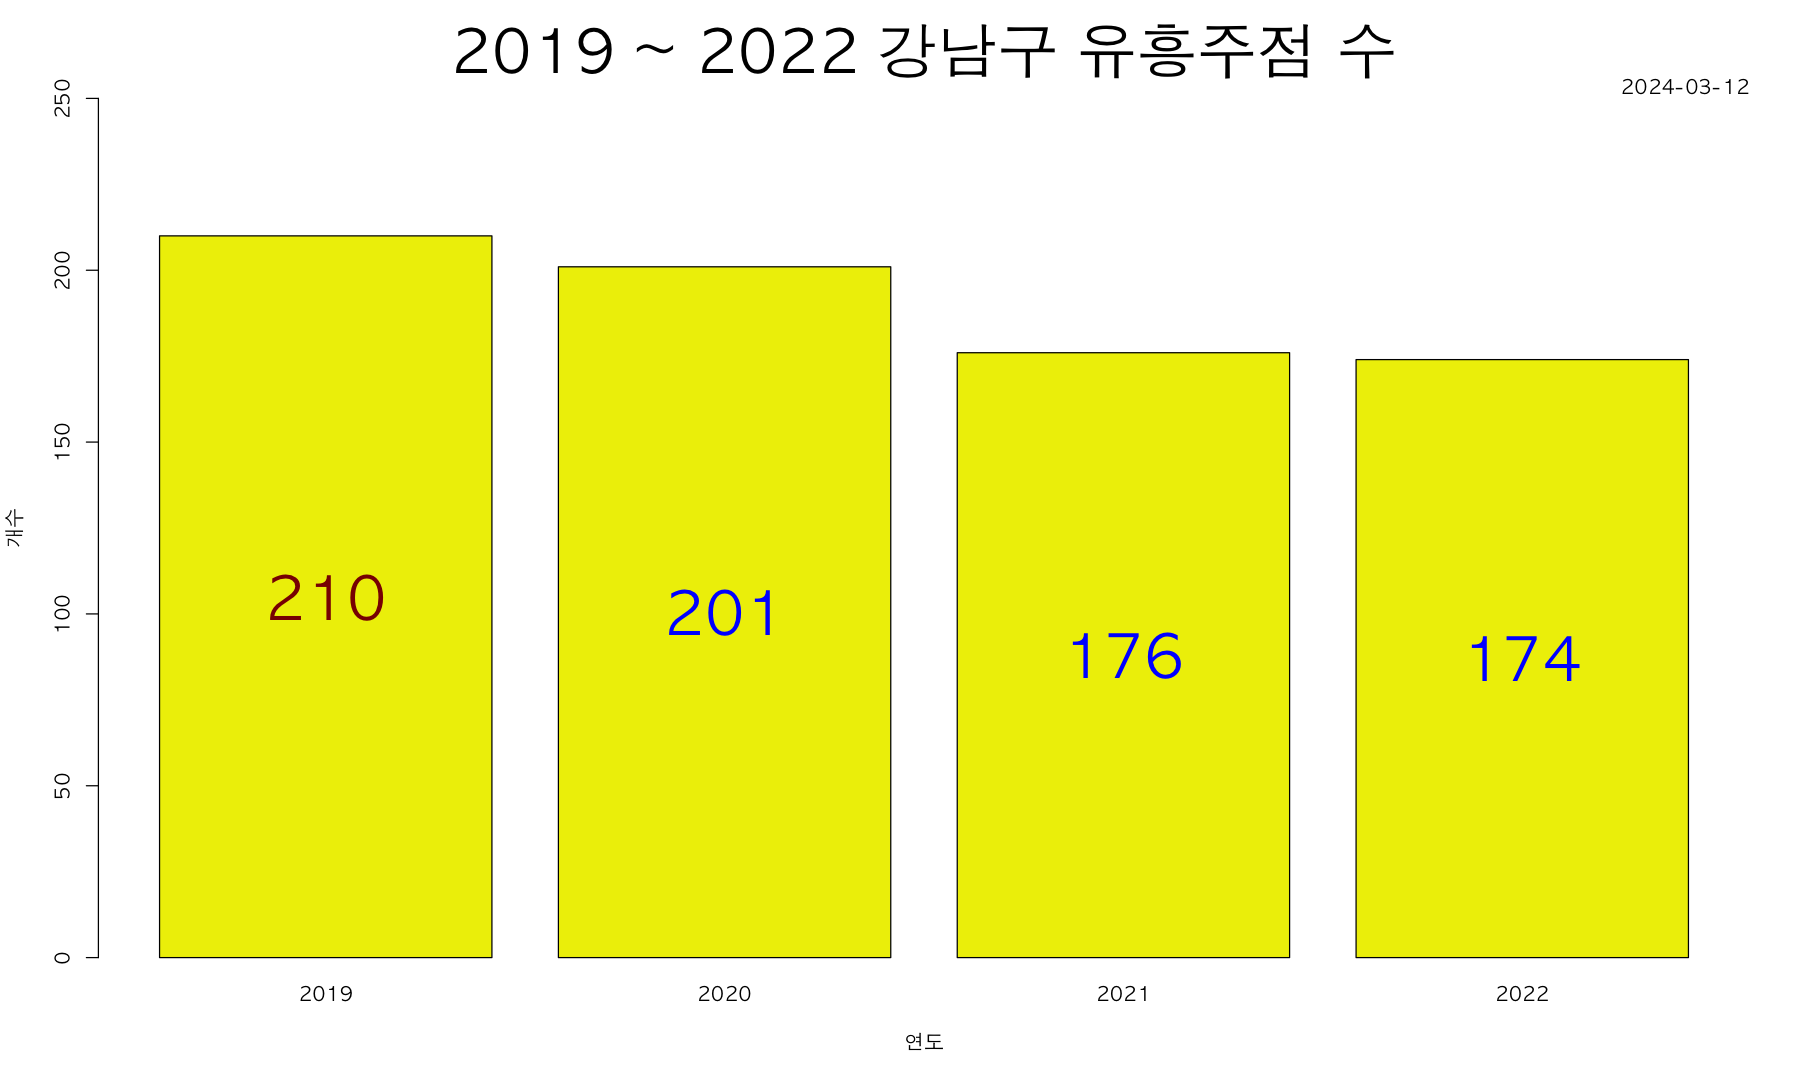

In [617]:
par(family = "AppleGothic",bg = "white")
barplot(
    as.integer(store_강남_년도별),
    names = c(2019:2022),
    ylim = c(0,250),
    col = 'yellow2',
    xlab = '연도',
    ylab = '개수'
)
mtext("2024-03-12", side = 3, adj = 1, cex = 1)
title(
    main = "2019 ~ 2022 강남구 유흥주점 수",
    cex.main = 3
)
text(
    c(0.7,1.9,3.1,4.3,5.5),as.integer(store_강남_년도별) / 2,as.integer(store_강남_년도별),
    col = c('darkred',rep('blue',1,3)),
    cex = 3
)

In [524]:
rownames(store_강남_년도별) <- "유흥주점의 수"

In [532]:
as.integer(store_강남_년도별)

[1] 210 201 176 174

In [730]:
arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[1:5,]
arrange(subset(crime,발생년도 == '2019'),desc(폭력발생))[21:25,]

,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,강남구,5,3,5,6,666,562,2970,1339,3658,3159
2,2019,영등포구,10,10,3,3,356,239,2409,1068,3042,2467
3,2019,송파구,7,8,10,10,273,230,2416,1016,2992,2535
4,2019,관악구,13,10,10,11,408,335,2223,1085,2674,2369
5,2019,서초구,5,5,7,5,616,412,2270,1118,2644,2210


,발생년도,자치구별,살인발생,살인검거,강도발생,강도검거,강간/강제추행발생,강간/강제추행검거,절도발생,절도검거,폭력발생,폭력검거
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,2019,성북구,3,3,3,3,176,130,1082,731,1613,1456
22,2019,양천구,6,6,2,2,127,112,1477,634,1602,1370
23,2019,서대문구,2,1,5,5,175,154,1226,600,1535,1260
24,2019,성동구,6,5,9,10,133,96,970,511,1394,1216
25,2019,도봉구,1,1,5,5,90,83,790,394,1224,1014
